## MNIST Dataset

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import pickle
import time
from sklearn.model_selection import cross_val_predict, cross_val_score

---
### Download the MNIST dataset from openml

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
# as_frame = False make the the data and target to be NumPy arrays

In [4]:
# Extract the data and the labels(targets)
X = mnist.data
y = mnist.target

---
### Explore Data

In [63]:
type(X), X.shape

(numpy.ndarray, (70000, 784))

In [64]:
type(y), y.shape

(numpy.ndarray, (70000,))

In [65]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
# Image data are in a numpy array of 28x28 = 784. To plot the images, need to reshape them into 28x28

def plot_image(digit):
    plt.figure(figsize=(2,2))
    plt.imshow(digit.reshape((28,28)), cmap='gray')
    plt.axis('off')

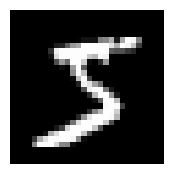

In [67]:
plot_image(X[0])

In [43]:
y[0]

'5'

---
### Train-Test split

This is already split into training and test sets. First 60000 images are the training images and the next 10000 are the test set

In [6]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [7]:
# Store mean cross validation accuracy
mean_cv_accuracy = []

---
### Linear Classifiers

#### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logit_model = LogisticRegression(random_state=123)
st_time = time.time()
logit_score= cross_val_score(logit_model, X_train, y_train, cv = 3, scoring='accuracy', verbose=2)
time_elapsed = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Program Files\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.7s remaining:    0.0s


[CV] END .................................................... total time=  18.5s


C:\Program Files\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................................... total time=  19.6s
[CV] END .................................................... total time=  20.1s


C:\Program Files\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.7s finished


In [10]:
logit_score

array([0.91275, 0.91565, 0.9171 ])

In [11]:
np.mean(logit_score)

0.9151666666666666

In [12]:
mean_cv_accuracy.append(('logit_score', np.mean(logit_score), time_elapsed))

**Scaling data to see if it would impore the performance**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))

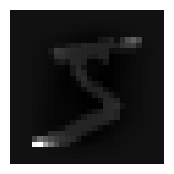

In [20]:
plot_image(X_train_scaled[0])

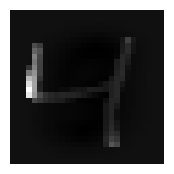

In [22]:
plot_image(X_train_scaled[2])

**Standard scaling would highlight parts that are out of the common area**

In [15]:
logit_model = LogisticRegression(random_state=123)
st_time = time.time()
logit_score_scaled = cross_val_score(logit_model, X_train_scaled, y_train, cv = 3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Program Files\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s remaining:    0.0s


[CV] END .................................................... total time=  19.9s


C:\Program Files\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................................... total time=  18.9s
[CV] END .................................................... total time=  20.2s


C:\Program Files\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   59.3s finished


In [16]:
logit_score_scaled

array([0.90595, 0.9081 , 0.91005])

In [17]:
mean_cv_accuracy.append(('logit_score_scaled', np.mean(logit_score_scaled), elapsed_time))

**Not much of a improvement with standard scaling**

#### SGD Classifier

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sgd_model = SGDClassifier(random_state=123)
st_time = time.time()
sgd_score = cross_val_score(sgd_model, X_train, y_train, cv=3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.8min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.7min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.0min finished


In [20]:
sgd_score

array([0.8738, 0.8682, 0.8855])

In [21]:
np.mean(sgd_score)

0.8758333333333334

In [22]:
mean_cv_accuracy.append(('sgd_score', np.mean(sgd_score), elapsed_time))

In [23]:
sgd_model = SGDClassifier(random_state=123)
st_time = time.time()
sgd_score_scaled = cross_val_score(sgd_model, X_train_scaled, y_train, cv=3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 4.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s


[CV] END .................................................... total time= 4.6min
[CV] END .................................................... total time= 4.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.4min finished


In [24]:
sgd_score_scaled

array([0.89215, 0.8929 , 0.9022 ])

In [25]:
np.mean(sgd_score_scaled)

0.89575

In [26]:
mean_cv_accuracy.append(('sgd_score_scaled', np.mean(sgd_score_scaled), elapsed_time))

**For SGD classifier there seems to be small improvment with scaling**

#### Compare the models using the score

Although we can see the mean values are different in the previous two models, we can verify that the difference is significant using a statistical test : independant t-test

In [88]:
from scipy.stats import ttest_ind

In [28]:
t_stat, p_val = ttest_ind(logit_score, sgd_score_scaled, equal_var=False)

In [29]:
t_stat, p_val

(5.585875874720348, 0.016236703436968945)

- **The difference is significant (p_val < 0.05). `logit_score` is better than `sgd_score_scaled`**

#### SVM with linear kernel

In [8]:
from sklearn.svm import SVC

**Training time of SVM scales exponentially with the size of data set. It is better to check the performance on a part of data, typically few thousands**

In [37]:
svml_model = SVC(kernel='linear', random_state=123)
st_time = time.time()
svml_scores = cross_val_score(svml_model, X_train[:30000], y_train[:30000], cv=3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  49.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.0s remaining:    0.0s


[CV] END .................................................... total time=  49.7s
[CV] END .................................................... total time=  49.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.5min finished


In [38]:
svml_scores

array([0.9109, 0.9045, 0.9098])

In [39]:
np.mean(svml_scores)

0.9084

In [40]:
mean_cv_accuracy.append(('svml_scores', np.mean(svml_scores), elapsed_time))

---
### SVM with with default RBF kernel

In [41]:
svm_model = SVC(random_state=123, C=10)
st_time = time.time()
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 4.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s


[CV] END .................................................... total time= 4.5min
[CV] END .................................................... total time= 4.9min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.6min finished


In [42]:
svm_scores

array([0.9821 , 0.97945, 0.97905])

In [43]:
np.mean(svm_scores)

0.9802

In [44]:
mean_cv_accuracy.append(('svm_scores', np.mean(svm_scores), elapsed_time))

---
### Tree Based Classifiers
#### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree_model = DecisionTreeClassifier(random_state=123, max_depth=16)
st_time = time.time()
tree_scores = cross_val_score(tree_model,X_train,y_train, cv=3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  13.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s remaining:    0.0s


[CV] END .................................................... total time=  12.6s
[CV] END .................................................... total time=  12.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.1s finished


In [47]:
tree_scores

array([0.8618 , 0.86175, 0.86885])

In [48]:
np.mean(tree_scores)

0.8641333333333333

In [49]:
mean_cv_accuracy.append(('tree_scores', np.mean(tree_scores), elapsed_time))

#### Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gb_model = GradientBoostingClassifier(n_estimators=20, random_state=123)
st_time = time.time()
gb_scores = cross_val_score(gb_model,X_train[:5000],y_train[:5000], cv=3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  53.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.2s remaining:    0.0s


[CV] END .................................................... total time=  47.6s
[CV] END .................................................... total time=  47.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.5min finished


In [52]:
gb_scores

array([0.85002999, 0.87822436, 0.8517407 ])

In [53]:
np.mean(gb_scores)

0.8599983484695617

In [54]:
mean_cv_accuracy.append(('gb_scores', np.mean(gb_scores), elapsed_time))

#### XGBoost Classifier

In [55]:
from xgboost import XGBClassifier

In [57]:
xgb_model = XGBClassifier(objective='multi:softprob')
st_time = time.time()
xgb_scores = cross_val_score(xgb_model, X_train, y_train.astype('int'), cv=3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=14.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.0min remaining:    0.0s


[CV] END .................................................... total time=13.3min
[CV] END .................................................... total time=14.2min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 41.5min finished


In [58]:
xgb_scores

array([0.97465, 0.97065, 0.9732 ])

In [59]:
np.mean(xgb_scores)

0.9728333333333333

In [60]:
mean_cv_accuracy.append(('xgb_scores', np.mean(xgb_scores), elapsed_time))

#### Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_model = RandomForestClassifier(random_state=123)
st_time = time.time()
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  37.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.8s remaining:    0.0s


[CV] END .................................................... total time=  39.3s
[CV] END .................................................... total time=  39.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min finished


In [63]:
rf_scores

array([0.96645, 0.9635 , 0.96515])

In [64]:
np.mean(rf_scores)

0.9650333333333334

In [65]:
mean_cv_accuracy.append(('rf_scores', np.mean(rf_scores), elapsed_time))

---
### KNearestNeighbor Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_model = KNeighborsClassifier(n_neighbors=5)
st_time = time.time()
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=3, scoring='accuracy', verbose=2)
elapsed_time = time.time()-st_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  35.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.3s remaining:    0.0s


[CV] END .................................................... total time=  36.7s
[CV] END .................................................... total time=  37.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.8min finished


In [68]:
knn_scores

array([0.9676 , 0.9671 , 0.96755])

In [69]:
np.mean(knn_scores)

0.9674166666666667

In [70]:
mean_cv_accuracy.append(('knn_scores', np.mean(knn_scores), elapsed_time))

---
### Performance comparison

In [90]:
model_performance = pd.DataFrame(mean_cv_accuracy, columns=['model', 'mean_cv_accuracy', 'elapsed_time'])
model_performance = model_performance.sort_values('mean_cv_accuracy', ascending=False).reset_index(drop=True)
model_performance['mean_cv_accuracy'] = round(model_performance['mean_cv_accuracy']*100,2)
model_performance['elapsed_time'] = round(model_performance['elapsed_time']).astype('int')

In [91]:
model_performance

,model,mean_cv_accuracy,elapsed_time
0,svm_scores,98.02,814
1,xgb_scores,97.28,2490
2,knn_scores,96.74,110
3,rf_scores,96.50,117
4,logit_score,91.52,59
5,svml_scores,90.84,149
6,logit_score_scaled,90.80,59
7,sgd_score_scaled,89.58,806
8,sgd_score,87.58,303
9,tree_scores,86.41,38


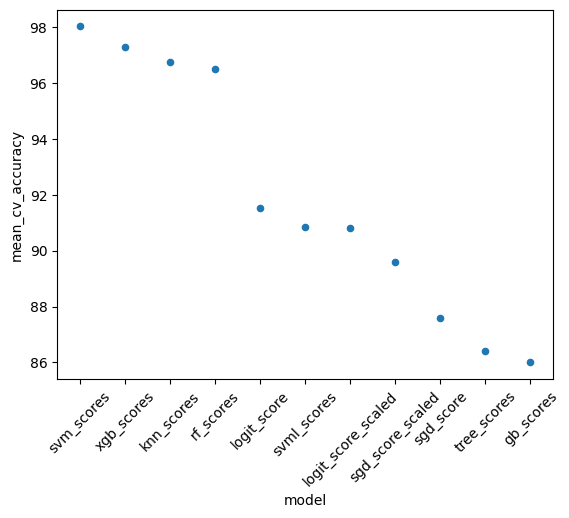

In [98]:
model_performance.plot(kind='scatter', x='model', y='mean_cv_accuracy')
plt.xticks(rotation = 45) 
plt.show()

Out of the models we tried, top four stand apart from the rest

---
### Fine tune hyperparamters

Out of the top four, we will try to tune the KNN and Random Forest first, to see if they can outperform the other two, since they take much less time to be trained.

Before moving on with hypterparamters, we will check if the scaled input can improve the performance

We already created `X_train_scaled` with standard scaler, and we will try the min-max scalter too

In [99]:
X_train_std_scaled = X_train_scaled

In [100]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_train_mm_scaled = mm_scaler.fit_transform(X_train)

In [111]:
knn_scores_std_scaled = cross_val_score(knn_model, X_train_std_scaled, y_train, cv=10, scoring='accuracy', verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  24.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s remaining:    0.0s


[CV] END .................................................... total time=  28.4s
[CV] END .................................................... total time=  28.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished


In [112]:
knn_scores_std_scaled

array([0.9376, 0.9411, 0.9424])

In [113]:
np.mean(knn_scores_std_scaled)

0.9403666666666667

In [114]:
rf_scores_std_scaled  = cross_val_score(rf_model, X_train_std_scaled, y_train, cv=3, scoring='accuracy', verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  42.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.6s remaining:    0.0s


[CV] END .................................................... total time= 1.0min
[CV] END .................................................... total time=  42.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished


In [115]:
rf_scores_std_scaled

array([0.96645, 0.9636 , 0.96525])

In [116]:
np.mean(rf_scores_std_scaled)

0.9651000000000001

In [117]:
knn_scores_mm_scaled = cross_val_score(knn_model, X_train_mm_scaled, y_train, cv=3, scoring='accuracy', verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  27.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.0s remaining:    0.0s


[CV] END .................................................... total time=  28.8s
[CV] END .................................................... total time=  27.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished


In [118]:
np.mean(knn_scores_mm_scaled)

0.9674333333333333

In [119]:
rf_scores_mm_scaled  = cross_val_score(rf_model, X_train_mm_scaled, y_train, cv=3, scoring='accuracy', verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  42.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.9s remaining:    0.0s


[CV] END .................................................... total time=  42.2s
[CV] END .................................................... total time=  40.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.1min finished


In [120]:
np.mean(rf_scores_mm_scaled)

0.965

Not much improved with min_max scaling

#### GridSearchCV

We will tune hyper paramters with `GridSearchCV`

In [9]:
from sklearn.model_selection import GridSearchCV

**KNN**

In [12]:
knn_model = KNeighborsClassifier()

In [120]:
param_grid = [{'n_neighbors':[1,3,5],'weights':['uniform', 'distance']}]

In [121]:
grid_search_knn = GridSearchCV(knn_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=5)

In [122]:
grid_search_knn.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=1, weights=uniform;, score=0.969 total time=  28.8s
[CV 2/3] END ....n_neighbors=1, weights=uniform;, score=0.967 total time=  30.2s
[CV 3/3] END ....n_neighbors=1, weights=uniform;, score=0.967 total time=  30.9s
[CV 1/3] END ...n_neighbors=1, weights=distance;, score=0.969 total time=  31.1s
[CV 2/3] END ...n_neighbors=1, weights=distance;, score=0.967 total time=  31.2s
[CV 3/3] END ...n_neighbors=1, weights=distance;, score=0.967 total time=  31.9s
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  34.6s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  34.2s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  35.6s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  35.0s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  34.4s
[CV 3/3] END ...n_neighbors=3, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=5)

In [123]:
grid_search_knn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [124]:
grid_search_knn.best_score_

0.9693333333333333

In [113]:
params_set = {}
mean_scores = grid_search_knn.cv_results_['mean_test_score']
for p in grid_search_knn.cv_results_['params']:
    
    for k, v in p.items():
        params_set[k] = params_set.get(k,[]) + [v]

In [114]:
params_set['mean_score']=mean_scores

In [115]:
score_df = pd.DataFrame(params_set)

In [119]:
score_df.groupby(['weights'])['mean_score'].mean()

weights
distance    0.966203
uniform     0.964783
Name: mean_score, dtype: float64

In [25]:
knn_opt_model = grid_search_knn.best_estimator_

**RandomForest**

In [136]:
param_grid = [{'max_depth':[30,50,None]}]

In [137]:
rf_model = RandomForestClassifier(random_state=123)

In [138]:
grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)

In [ ]:
grid_search_rf.fit(X_train, y_train)

In [111]:
grid_search_rf.best_params_

{'max_depth': 30}

**SVM**

In [148]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf']} 

In [145]:
svm_model = SVC(random_state=123)

In [146]:
grid_search_rf = GridSearchCV(svm_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)

In [143]:
grid_search_rf.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .................C=0.1, kernel=rbf;, score=0.953 total time= 9.6min
[CV 2/3] END .................C=0.1, kernel=rbf;, score=0.950 total time= 9.1min
[CV 3/3] END .................C=0.1, kernel=rbf;, score=0.953 total time=10.6min
[CV 1/3] END ...................C=1, kernel=rbf;, score=0.977 total time= 5.1min
[CV 2/3] END ...................C=1, kernel=rbf;, score=0.974 total time= 4.9min
[CV 3/3] END ...................C=1, kernel=rbf;, score=0.974 total time= 5.1min
[CV 1/3] END ..................C=10, kernel=rbf;, score=0.982 total time= 4.8min
[CV 2/3] END ..................C=10, kernel=rbf;, score=0.979 total time= 4.6min
[CV 3/3] END ..................C=10, kernel=rbf;, score=0.979 total time= 4.6min
[CV 1/3] END .................C=100, kernel=rbf;, score=0.982 total time= 4.6min
[CV 2/3] END .................C=100, kernel=rbf;, score=0.979 total time= 5.6min
[CV 3/3] END .................C=100, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(random_state=123),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [7]:
svm_model_opt = SVC(random_state=123, C=10)

NameError: name 'SVC' is not defined

In [152]:
y_train_pred = cross_val_predict(svm_model_opt, X_train, y_train)

In [153]:
from sklearn.metrics import accuracy_score

In [159]:
accuracy_score(y_train, y_train_pred)

0.9819333333333333

In [15]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_train_pred))

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

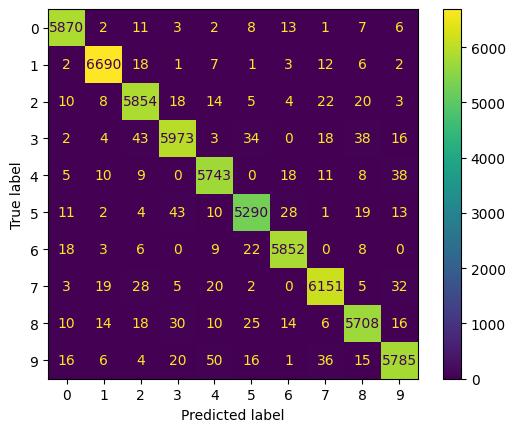

In [189]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

**To highlight the the errors, set the weights of correclty predicted values to zero**

In [190]:
weights = y_train != y_train_pred

In [1]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=weights)
plt.show()

NameError: name 'ConfusionMatrixDisplay' is not defined

**Get the percentages of errors out of all**

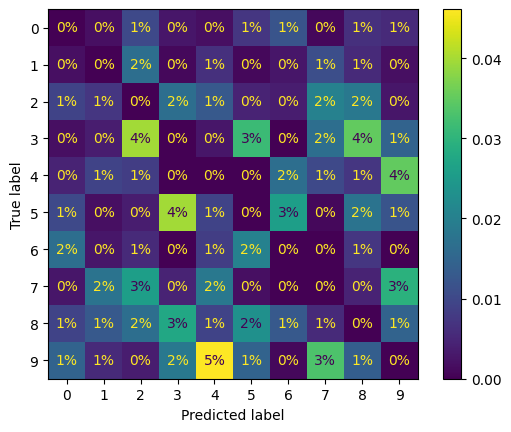

In [188]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='all', values_format='.0%',sample_weight=weights)
plt.show()

**Top errors the model makes:**
- Images of 9, predicting as 4
- Images of 3, predicting as 2
- Images of 5, predicting as 3

In [219]:
X_94 = X_train[(y_train=='9') & (y_train_pred=='4')]
X_99 = X_train[(y_train=='9') & (y_train_pred=='9')]
X_49 = X_train[(y_train=='4') & (y_train_pred=='9')]
X_44 = X_train[(y_train=='4') & (y_train_pred=='4')]
X_32 = X_train[(y_train=='3') & (y_train_pred=='2')]
X_53 = X_train[(y_train=='5') & (y_train_pred=='3')]
X_35 = X_train[(y_train=='3') & (y_train_pred=='5')]

In [194]:
X_94.shape

(50, 784)

In [55]:
def plot_100digits(digits):
    l = digits.shape[0]
    h = min(4,np.ceil((l//10 +1)*4/10))
    print(h)
    fig, ax = plt.subplots(nrows=min(10,l//10+2), ncols=10, figsize=(4,h))
    for i in range(min(100, 10*(l//10+2))):
        if i<l:
            im = digits[i].reshape(28,28)
            ax[i//10,i%10].imshow(im, cmap="gray")
        ax[i//10,i%10].axis('off')

In [ ]:
plot_100digits(X_32)

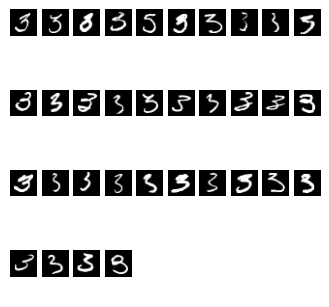

In [220]:
plot_100digits(X_35)

In [9]:
svm_model_opt = SVC(random_state=123, C=10, verbose=5)
svm_model_opt.fit(X_train,y_train)

[LibSVM]

SVC(C=10, random_state=123, verbose=5)

In [ ]:
y_train_pred = svm_model_opt.predict(X_train)

In [16]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [ ]:
with open('./models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model_opt,f)

In [13]:
y_test_pred = svm_model_opt.predict(X_test)

In [17]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



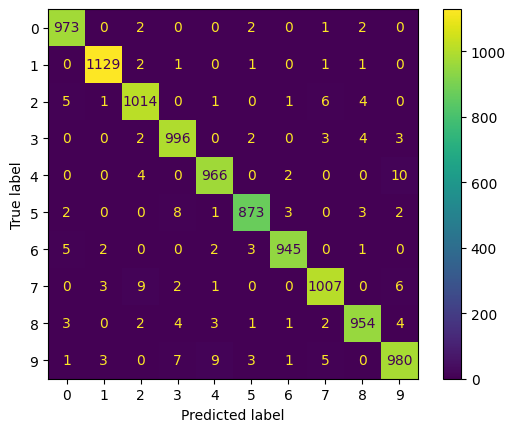

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

In [19]:
weights = y_test != y_test_pred

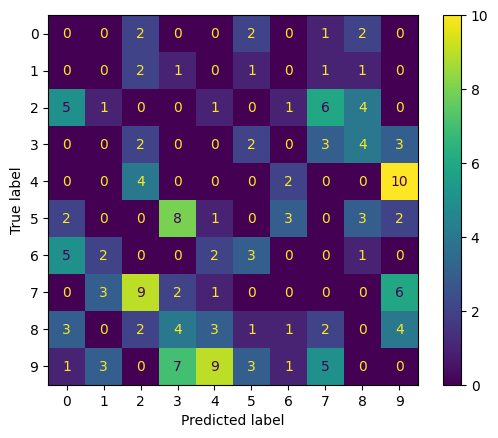

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,sample_weight= weights)
plt.show()

In [27]:
X_94 = X_test[(y_test=='9') & (y_test_pred=='4')]
X_49 = X_test[(y_test=='4') & (y_test_pred=='9')]
X_72 = X_test[(y_test=='7') & (y_test_pred=='2')]

In [29]:
len(X_94)

9

1.0


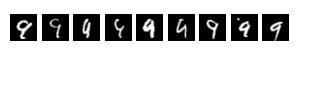

In [57]:
plot_100digits(X_94)

1.0


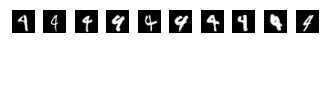

In [56]:
plot_100digits(X_49)

In [66]:
np.set_printoptions(linewidth=125) 

In [70]:
print(X_train[10].reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   